In [1]:
!pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3 MB 12 kB/s 
     |████████████████████████████████| 2.9 MB 42.5 MB/s 
     |████████████████████████████████| 462 kB 67.3 MB/s 
     |████████████████████████████████| 3.8 MB 48.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68714 sha256=57b005ad1cdef4d555513105770ddf166c58e1b0b7116fa924f313d200b5846c
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [2]:
pip install keras~=2.4.3

  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [3]:
# Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [4]:
!pip install --upgrade git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-ozsvnjob
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-ozsvnjob
     |████████████████████████████████| 3.3 MB 4.1 MB/s 
     |████████████████████████████████| 948 kB 62.6 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34557 sha256=4fe85ec85e667172709b0784416efe25f0a6332528b2fdc0a3065f8bf8a27d3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-89n5jqn0/wheels/78/73/a2/4ee9fce73985dcc4f889d3d012a4461d58254d0de99197af00
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resol

In [5]:
from keras_segmentation.models.unet import unet
model = unet(n_classes=3 ,  input_height=384, input_width=384)

#Après avoir préparé l'ensemble de données et construit le modèle, nous devons entraîner le modèle
model.train(
    train_images =  "/content/drive/MyDrive/data/images/",
    train_annotations = "/content/drive/MyDrive/data/masks/",
    epochs=10)


Verifying training dataset


100%|██████████| 307/307 [03:54<00:00,  1.31it/s]


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 3116s 6s/step - loss: 0.9923 - accuracy: 0.5609
Epoch 2/10
512/512 [==============================] - 3118s 6s/step - loss: 0.8276 - accuracy: 0.6346
Epoch 3/10
512/512 [==============================] - 3096s 6s/step - loss: 0.7852 - accuracy: 0.6572
Epoch 4/10
512/512 [==============================] - 3091s 6s/step - loss: 0.7602 - accuracy: 0.6775
Epoch 5/10
512/512 [==============================] - 3103s 6s/step - loss: 0.7268 - accuracy: 0.6952
Epoch 6/10
512/512 [==============================] - 3094s 6s/step - loss: 0.6907 - accuracy: 0.7127
Epoch 7/10
512/512 [==============================] - 3097s 6s/step - loss: 0.6953 - accuracy: 0.7152
Epoch 8/10
512/512 [==============================] - 3105s 6s/step - loss: 0.6655 - accuracy: 0.7279
Epoch 9/10
512/512 [==============================] - 3144s 6s/step - loss: 0.6368 - accuracy: 0.7414
Epoch 10/10
512/512 [==============================] - 3150s 6s

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

dict_keys(['loss', 'accuracy'])


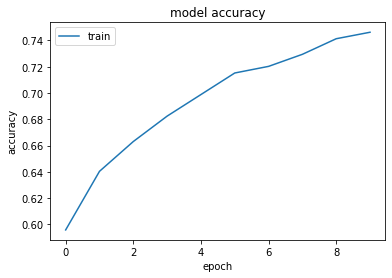

In [8]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

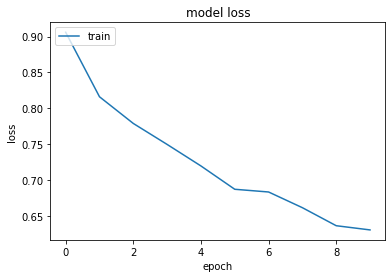

In [9]:
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

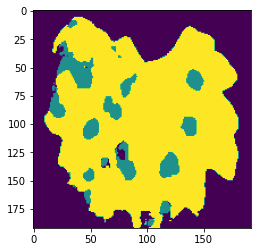

In [26]:

#voir la sortie du modèle sur une nouvelle image qui n'est pas présente dans l'ensemble d'apprentissage

out = model.predict_segmentation(
    inp="/content/drive/MyDrive/data/test_images/test_Grape_BlackRot_3.jpg",
    out_fname="/content/drive/MyDrive/data/out_imag.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)


In [20]:
# évaluation du modele sur les images du test 
print(model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/data/test_images"  ,
                                  annotations_dir="/content/drive/MyDrive/data/test_mask" ) )

21it [00:46,  2.21s/it]

{'frequency_weighted_IU': 0.7177702698952533, 'mean_IU': 0.6269863724538675, 'class_wise_IU': array([0.75600358, 0.3687705 , 0.75618504])}
